# Visualizing the Distribution of data values in Iris Features 

In previous notebook [Generating Iris Statistics](iris_statistical_summary.ipynb), we looked at the first step in data analysis: generating the key statistical characteristics of each feature in the Irs dataset.   
 We will now visually explore the characteristics of these features further with the use of :  
 * Histograms  
   
https://matplotlib.org/stable/gallery/statistics/hist.html  

In this notebook, each Feature's data series *will be treated separately*, and relationships between features will be looked at in a later notebook.   
Furthermore, the csv loaded Column **'variety'** is not suited for analysis

In [1]:
#import required modules 
import pandas as pd
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt

#load local cvs file located in .\resources\iris.data
iris = pd.read_csv("../resources/iris.csv")

***
#### Experiment with **matplotlib.pyplot** Histograms ...</br>
https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py   


Try our first basic plot ...   

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

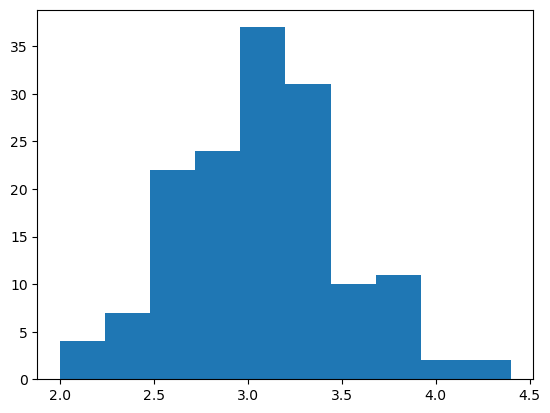

In [2]:
#Plot feature 'sepal.width' with 10 bins (No titles, legends, annotations, axis labels, etc. yet)
plt.hist(iris[:]['sepal.width'], bins = 10)

***
### Add Titles, Labels, and Colors 

Text(0, 0.5, 'Frequency')

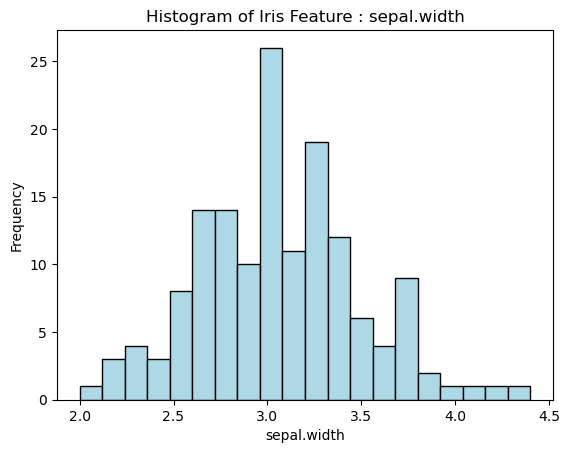

In [3]:
#Plot feature column 'sepal.width' with 20 bins, add colors, title and xy labels
feature_name = 'sepal.width'
plt.hist(iris[:][feature_name], bins = 20, edgecolor = 'black', color='lightblue')
plt.title(f'Histogram of Iris Feature : {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Frequency')

***
### Show a grid a Histogram of each Iris Feature

Use finding from subplots/grids explored in notebook [exploring matplotlib](exploring_matplotlib_layouts.ipynb)

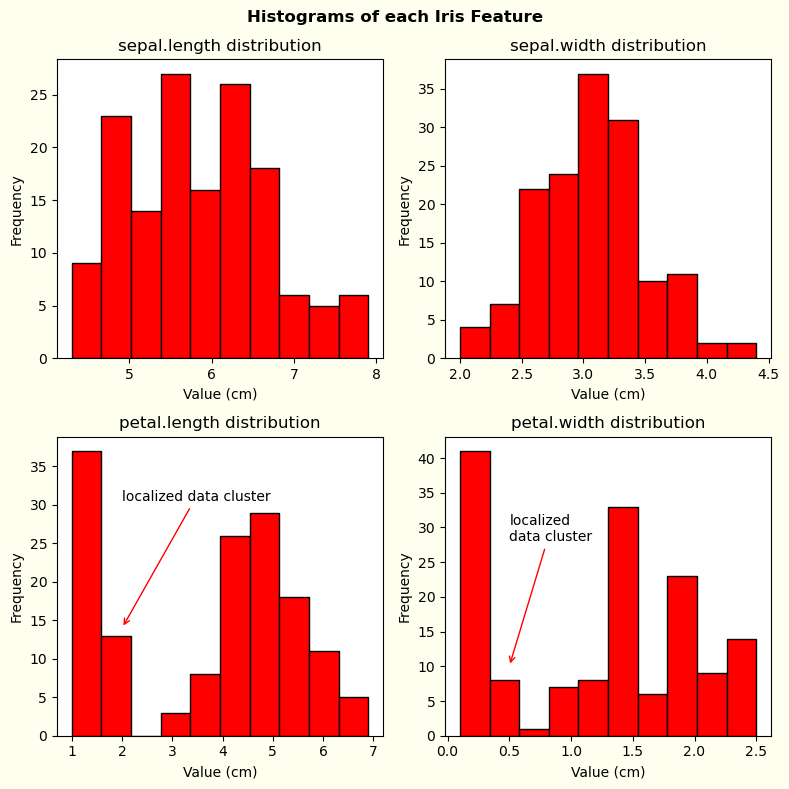

In [4]:
#Iterate into each feature of Iris Dataset and plot each feature

#plot a grid of 2 x 2 plots in a 800 x 800 canvas (figure)
fig, ax = plt.subplots(2,2, tight_layout = True, figsize=(8,8), facecolor='ivory') 
#add a super title main figure
fig.suptitle("Histograms of each Iris Feature", fontweight='bold')

#iterate thru feature data and plot each series
feature_names = iris.columns
for i in range(2):
    for j in range(2):
        my_ax = ax[i,j]
        idx = j+(i*2)
        feature_name = feature_names[idx]
        my_ax.hist(iris[:][feature_name], bins=10, edgecolor='black', color='red')
        my_ax.set_title(f'{feature_name} distribution')
        my_ax.set_xlabel('Value (cm)')
        my_ax.set_ylabel('Frequency')


#Extra: Added an annotation/arrow to highlight localized data cluster
ax[1,0].annotate('localized data cluster', xy=(2, 14), xycoords='data',
            xytext=(2, 32), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='red',lw=1,ls='-'),
            horizontalalignment='left', verticalalignment='top')
ax[1,1].annotate('localized\ndata cluster', xy=(0.5, 10), xycoords='data',
            xytext=(0.5, 32), textcoords='data',
            arrowprops=dict(arrowstyle= '->', color='red',lw=1,ls='-'),
            horizontalalignment='left', verticalalignment='top')


plt.tight_layout()  # better spacing to avoid labels overlapping
plt.show()


### As annotations show, in the Petal width/length plots there appears to be local clusters of data   
We need to now look at plotting iris varieties/classes separately   
Lets plot 3 separate figures for each class of Iris

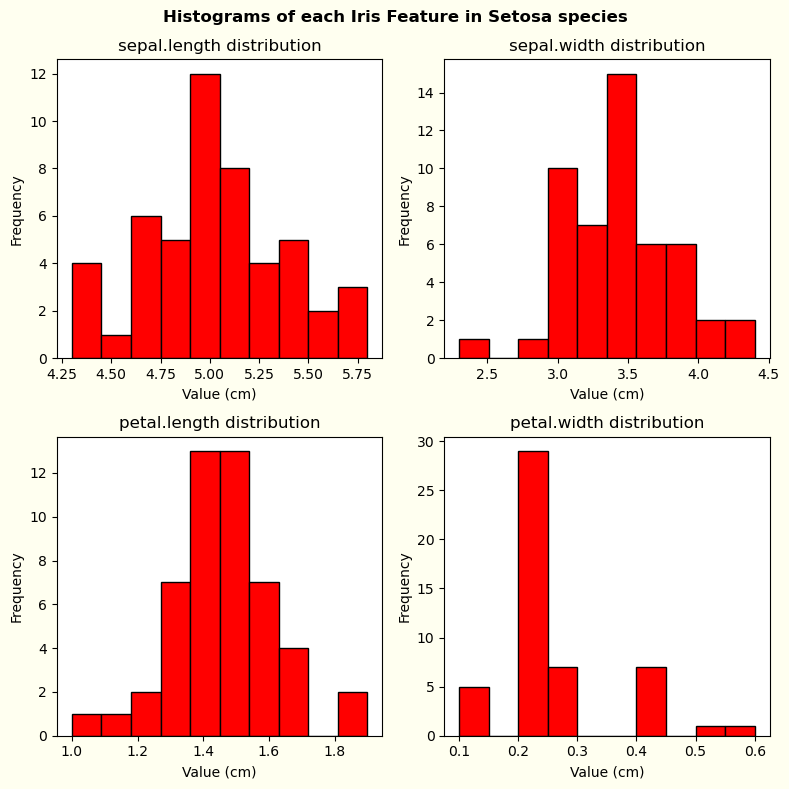

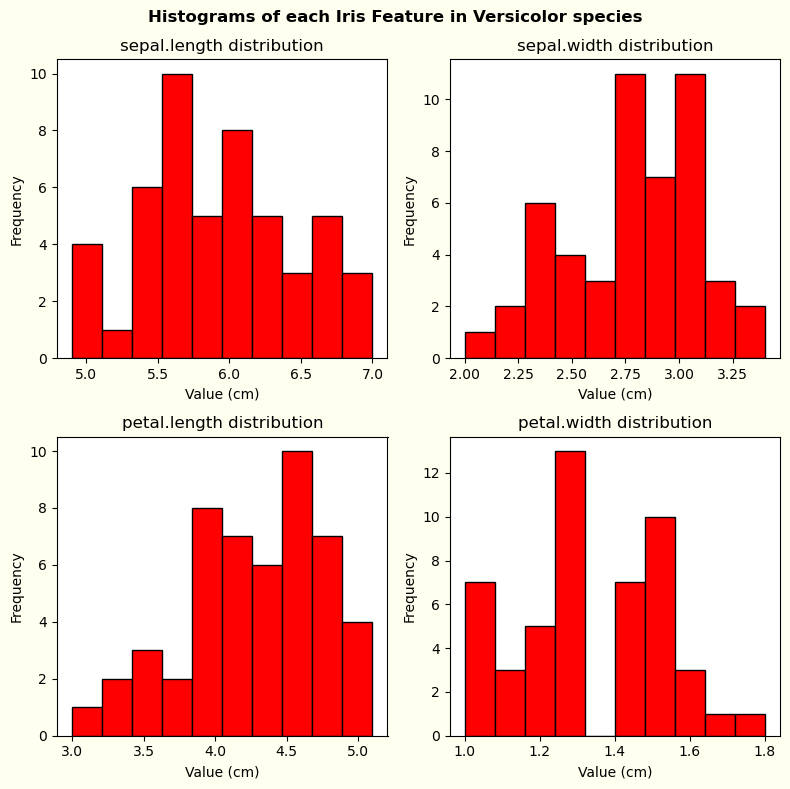

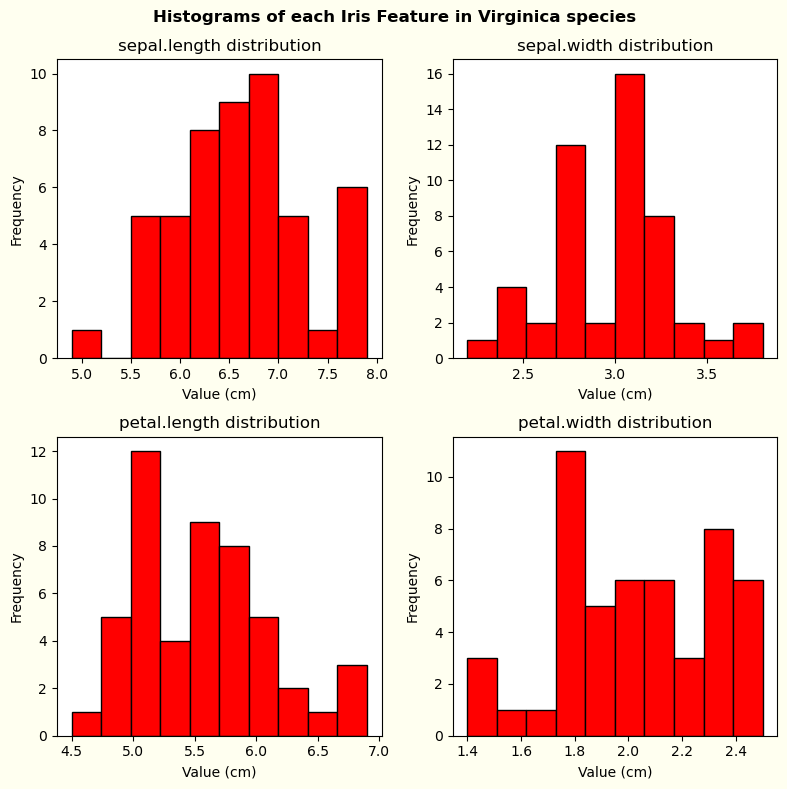

In [5]:
# Define the colors for the 3 species
iris_species = ['Setosa','Versicolor','Virginica']
for ispecies in iris_species:
    #plot a grid of 2 x 2 plots in a 800 x 800 canvas (figure)
    fig, ax = plt.subplots(2,2, tight_layout = True, figsize=(8,8), facecolor='ivory') 
    #add a super title main figure
    fig.suptitle(f"Histograms of each Iris Feature in {ispecies} species", fontweight='bold')

    #iterate thru feature data and plot each series
    feature_names = iris.columns
    for i in range(2):
        for j in range(2):
            my_ax = ax[i,j]
            idx = j+(i*2)
            feature_name = feature_names[idx]
            species_feature_data = iris[iris['variety'] == ispecies]
            my_ax.hist(species_feature_data[feature_name], bins=10, edgecolor='black', color='red')
            my_ax.set_title(f'{feature_name} distribution')
            my_ax.set_xlabel('Value (cm)')
            my_ax.set_ylabel('Frequency')

    plt.tight_layout()
plt.show()

***
This analysis of iris features is expanded with the application of the BoxPlot visualization.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Michelsonmorley-boxplot.svg/330px-Michelsonmorley-boxplot.svg.png)

https://en.wikipedia.org/wiki/Box_plot   
I will use the boxplot() from matplotlib  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html  

***

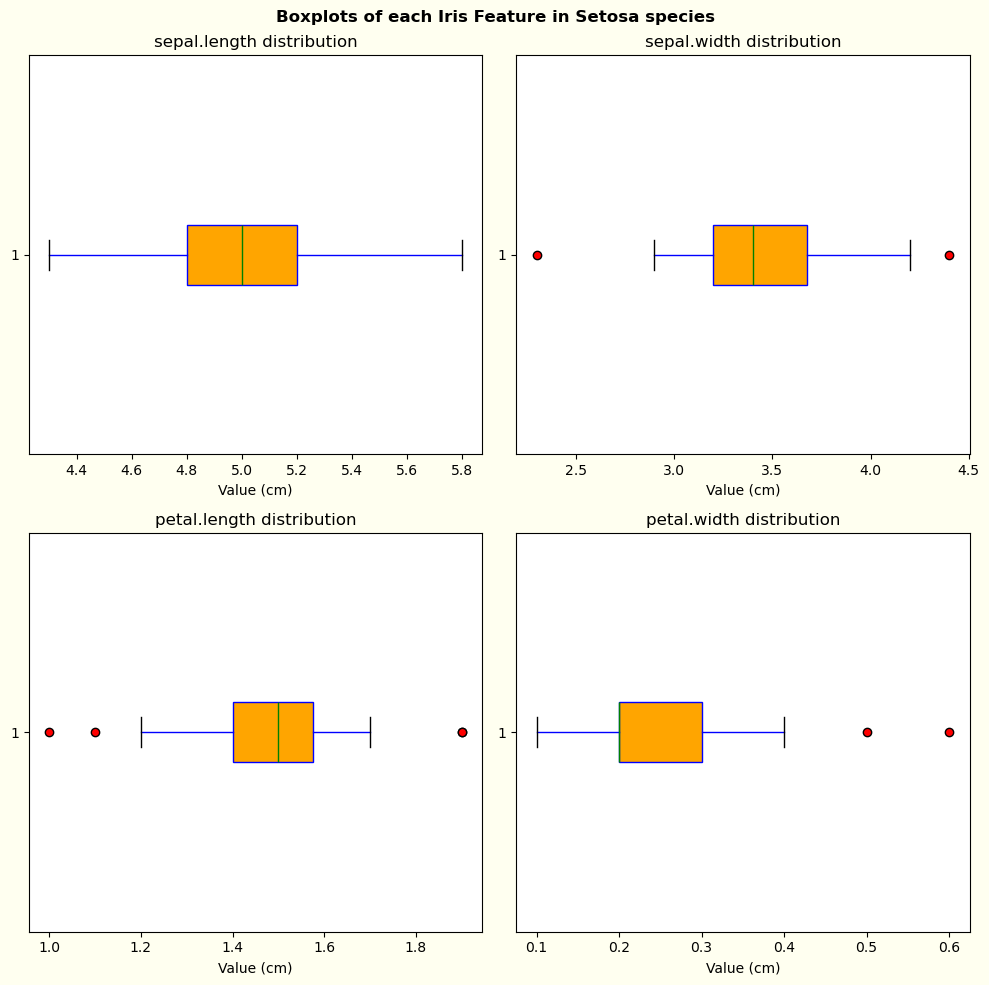

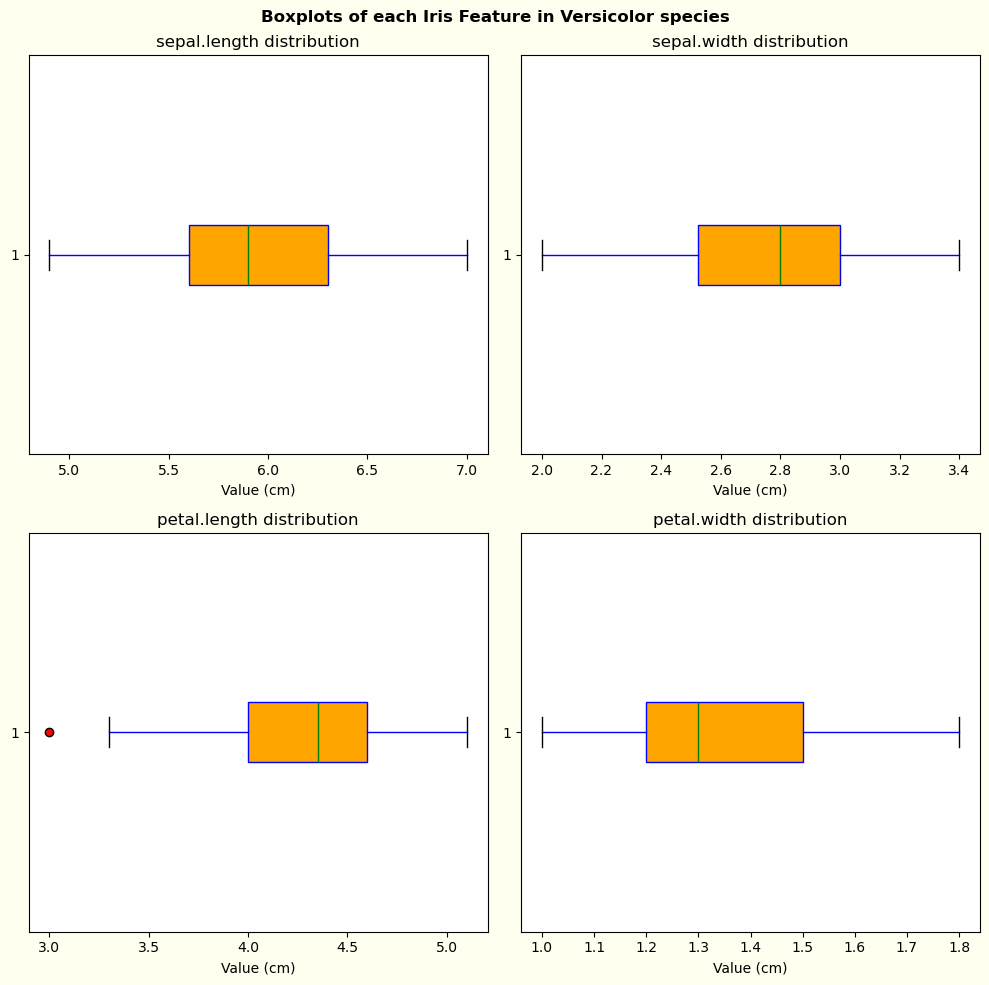

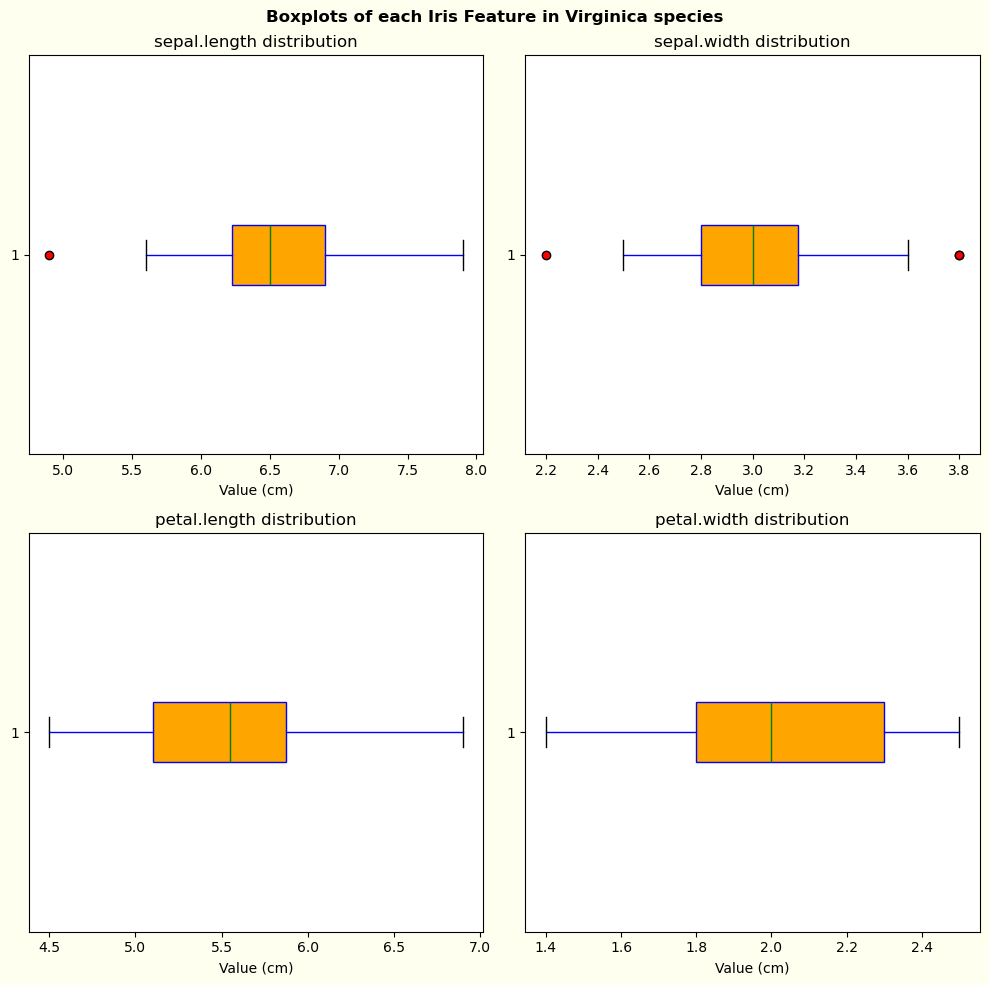

In [6]:
# Define the colors for the 3 species
iris_species = ['Setosa','Versicolor','Virginica']
for ispecies in iris_species:
    #plot a grid of 2 x 2 plots in a 1000 x 1000 canvas (figure)
    fig, ax = plt.subplots(2,2, tight_layout = True, figsize=(10,10), facecolor='ivory') 
    #add a super title main figure
    fig.suptitle(f"Boxplots of each Iris Feature in {ispecies} species", fontweight='bold')

    #iterate thru feature data and plot each series
    feature_names = iris.columns
    for i in range(2):
        for j in range(2):
            my_ax = ax[i,j]
            idx = j+(i*2)
            feature_name = feature_names[idx]
            species_feature_data = iris[iris['variety'] == ispecies]
            #my_ax.hist(species_feature_data[feature_name], bins=10, edgecolor='black', color='red')
            my_ax.boxplot(species_feature_data[feature_name], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='blue'),
                whiskerprops=dict(color='blue'), flierprops=dict(markerfacecolor='red', marker='o', markersize=6),
                medianprops=dict(color='green'))
            my_ax.set_title(f'{feature_name} distribution')
            my_ax.set_xlabel('Value (cm)')
            #No need for Y axis label

    plt.tight_layout()
plt.show()

### Lets superimpose histograms and boxplots on same subplots ...   
Use **twinx()** operation to create a twin Axes for 2 plots to share the xaxis.

In the final standalone code file [distribution_analysis.py](../code/distrbution_analysis.py) for this stage of analysis ... 
1. I'll superimpose both hisogram and boxplot on same plt for all features of Iris dataset
2. I'll reference the statistical module n(from last stage) and add statistical info in the plot annotations

![alt text](../images/distribution_plots.png)